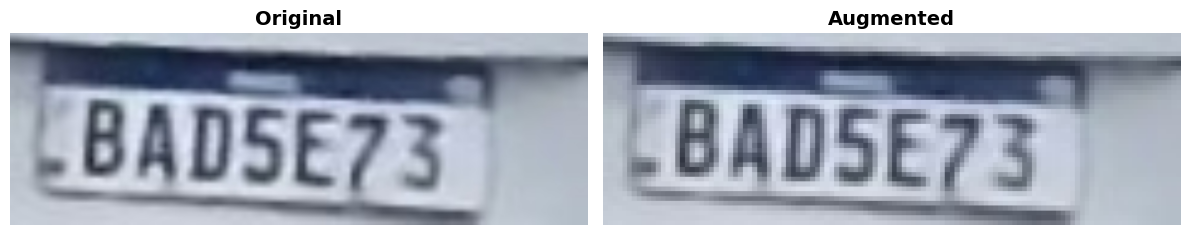

In [ ]:
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

sys.path.insert(0, '/home/temp-user/workspace/plate-recognition-low-resolution/straug')

from straug.weather import Snow, Rain
from straug.noise import GaussianNoise, ShotNoise, ImpulseNoise, SpeckleNoise
from straug.camera import JpegCompression, Pixelate

class PlateAugmentor:
    def __init__(self):
        self.aug_groups = [
            [Snow(), Rain()],
            [JpegCompression(), Pixelate()],
            # [GaussianNoise(), ShotNoise(), ImpulseNoise(), SpeckleNoise()],
        ]

    def __call__(self, img):
        mag = 2
        for i, group in enumerate(self.aug_groups):
            aug = group[np.random.randint(0, len(group))]
            img = aug(img, mag=mag, prob=1.0)
        return img

# Load test image
img_path = "/home/temp-user/workspace/plate-recognition-low-resolution/data/preprocessed/Scenario-B/Mercosur/track_15582/hr-001.jpg"
img = Image.open(img_path).convert('RGB')

augmentor = PlateAugmentor()
aug_img = augmentor(img.copy())

# Display
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(img)
axes[0].set_title('Original', fontsize=14, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(aug_img)
axes[1].set_title('Augmented', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

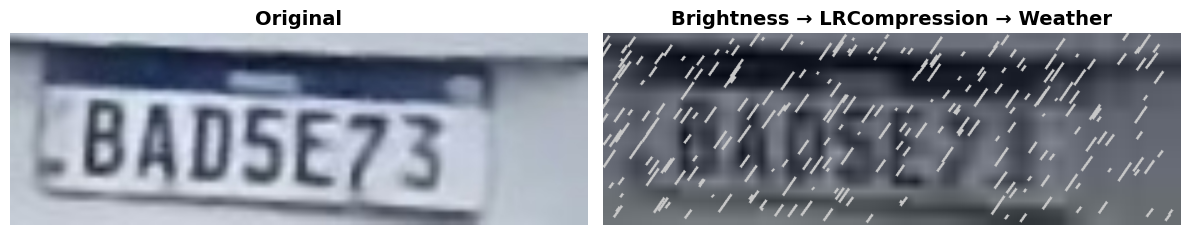

In [6]:
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

sys.path.insert(0, '/home/temp-user/workspace/plate-recognition-low-resolution/straug')

from straug.camera import Brightness, LRCompression
from straug.weather import Snow, Rain

img_path = "/home/temp-user/workspace/plate-recognition-low-resolution/data/preprocessed/Scenario-B/Mercosur/track_15582/hr-001.jpg"
img = Image.open(img_path).convert('RGB')

brightness = Brightness()
lr_comp = LRCompression()
weather = [Snow(), Rain()]

# Pipeline: Brightness → LRCompression → Weather (random 30% chance)
aug_img = brightness(img.copy(), mag=0, prob=1.0)
aug_img = lr_comp(aug_img, mag=0, prob=1.0)
aug_img = weather[np.random.randint(0, 2)](aug_img, mag=2, prob=0.7)

# Display
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img)
axes[0].set_title('Original', fontsize=14, fontweight='bold')
axes[0].axis('off')
axes[1].imshow(aug_img)
axes[1].set_title('Brightness → LRCompression → Weather', fontsize=14, fontweight='bold')
axes[1].axis('off')
plt.tight_layout()
plt.show()

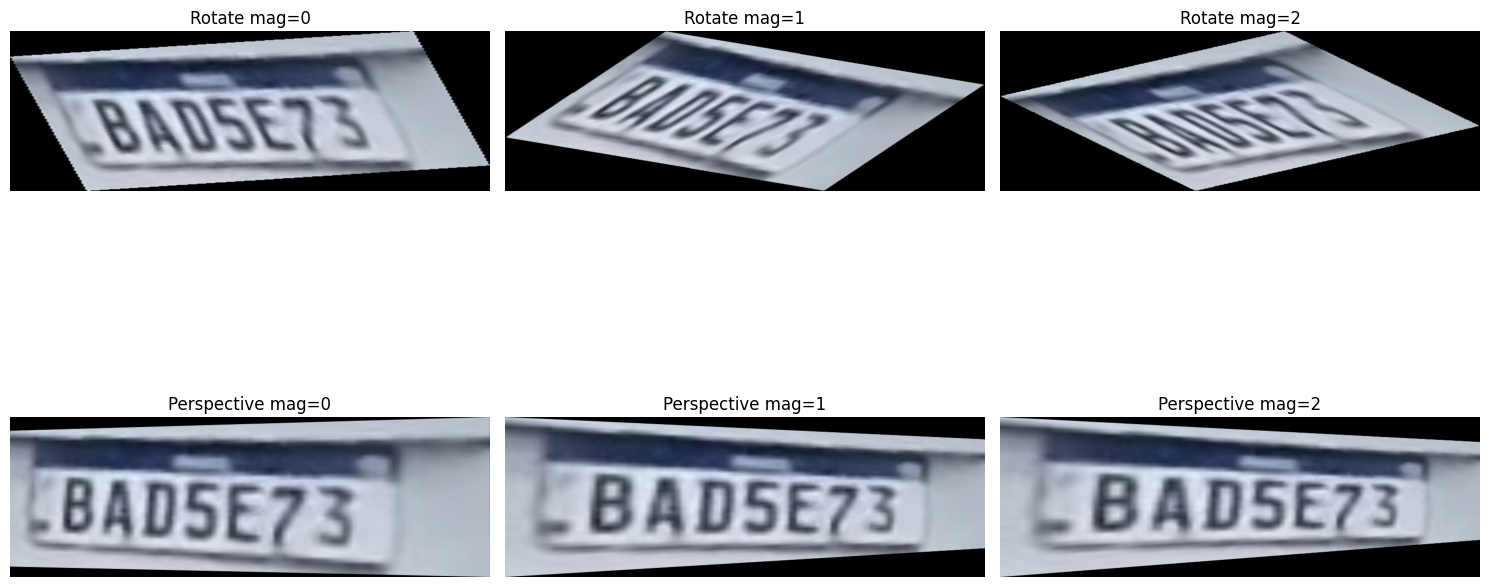

In [7]:
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

sys.path.insert(0, '/home/temp-user/workspace/plate-recognition-low-resolution/straug')

from straug.geometry import Rotate, Perspective

img_path = "/home/temp-user/workspace/plate-recognition-low-resolution/data/preprocessed/Scenario-B/Mercosur/track_15582/hr-001.jpg"
img = Image.open(img_path).convert('RGB')

rotate = Rotate()
perspective = Perspective()

# Test cả 2
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Row 1: Rotate
axes[0, 0].imshow(img)
axes[0, 0].set_title('Original', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

for i, mag in enumerate([0, 1, 2]):
    rot_img = rotate(img.copy(), mag=mag, prob=1.0)
    axes[0, i].imshow(rot_img)
    axes[0, i].set_title(f'Rotate mag={mag}', fontsize=12)
    axes[0, i].axis('off')

# Row 2: Perspective
for i, mag in enumerate([0, 1, 2]):
    persp_img = perspective(img.copy(), mag=mag, prob=1.0)
    axes[1, i].imshow(persp_img)
    axes[1, i].set_title(f'Perspective mag={mag}', fontsize=12)
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

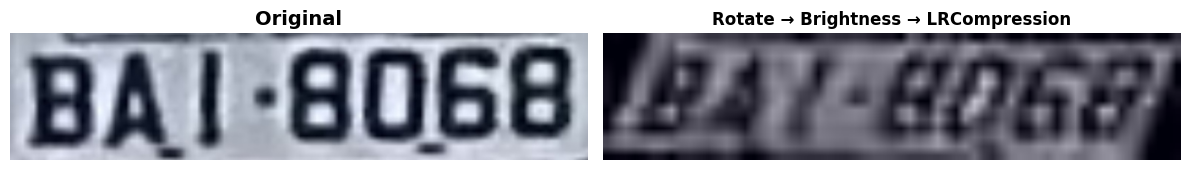

In [57]:
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

sys.path.insert(0, '/home/temp-user/workspace/plate-recognition-low-resolution/straug')

from straug.camera import Brightness, LRCompression
from straug.weather import Snow, Rain
from straug.geometry import Rotate, Perspective

img_path = "/home/temp-user/workspace/plate-recognition-low-resolution/data/preprocessed_cropped/Scenario-B/Brazilian/track_10001/hr-005.jpg"
img = Image.open(img_path).convert('RGB')

brightness = Brightness()
lr_comp = LRCompression()
weather = [Snow(), Rain()]
geometry = [(Rotate(), 0, 'rotate'), (Perspective(), 1, 'perspective')]

aug_img = img.copy()
geo_name = None
weather_name = None

# 1. Geometry (50% chance)
if np.random.uniform(0, 1) < 0.5:
    geo_idx = np.random.randint(0, 2)
    geo_aug, geo_mag, geo_name = geometry[geo_idx]
    aug_img = geo_aug(aug_img, mag=geo_mag, prob=1.0)

# 2. Brightness
aug_img = brightness(aug_img, mag=0, prob=1.0)

# 3. LRCompression
aug_img = lr_comp(aug_img, mag=1, prob=1.0)

# 4. Weather - SKIP if Geometry was applied
if geo_name is None:
    weather_idx = np.random.randint(0, 2)
    weather_name = ['Snow', 'Rain'][weather_idx]
    aug_img = weather[weather_idx](aug_img, mag=2, prob=0.7)

# Build title
steps = []
if geo_name:
    steps.append(geo_name.capitalize())
steps.append('Brightness')
steps.append('LRCompression')
if weather_name:
    steps.append(weather_name)
title = ' → '.join(steps)

# Display
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img)
axes[0].set_title('Original', fontsize=14, fontweight='bold')
axes[0].axis('off')
axes[1].imshow(aug_img)
axes[1].set_title(title, fontsize=12, fontweight='bold')
axes[1].axis('off')
plt.tight_layout()
plt.show()